#<font color='#8010CA'> **Setup**

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

if IS_COLAB or IS_KAGGLE:
    !pip install -q -U tfx==0.21.2
    print("You can safely ignore the package incompatibility errors.")

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

     |████████████████████████████████| 1.1 MB 7.6 MB/s 
     |████████████████████████████████| 147 kB 64.6 MB/s 
     |████████████████████████████████| 103 kB 44.7 MB/s 
     |████████████████████████████████| 1.5 MB 25.9 MB/s 
     |████████████████████████████████| 4.9 MB 45.2 MB/s 
     |████████████████████████████████| 636 kB 58.5 MB/s 
     |████████████████████████████████| 3.0 MB 42.4 MB/s 
     |████████████████████████████████| 59.2 MB 44 kB/s 
     |████████████████████████████████| 2.4 MB 47.4 MB/s 
     |████████████████████████████████| 241 kB 70.9 MB/s 
     |████████████████████████████████| 1.9 MB 37.1 MB/s 
     |████████████████████████████████| 1.2 MB 38.4 MB/s 
     |████████████████████████████████| 77 kB 5.4 MB/s 
     |████████████████████████████████| 218 kB 53.7 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 151 kB 60.4 MB/s 
     |████████████████████████████████| 82 kB 1.0 MB/s 
     |████████████████

#<font color='#8010CA'> **The Data API**

The `tf.data` API enables you to build complex input pipelines from simple, reusable pieces. `tf.data` also makes it possible to handle large amount of data, reading from different data formats, and perform complex transformation.

In [ ]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

Equivalently:

In [ ]:
dataset = tf.data.Dataset.range(10)
for item in dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


## <font color='#E123EC'> **Chaining Transformations**</font>
<center>
<img src='https://img-blog.csdnimg.cn/20200731145335575.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xpbmxpNTIyMzYyMjQy,size_16,color_FFFFFF,t_70' width = '600' height = '200' /> <figcaption> Chaining Dataset Transformations </figcaption>
</center>


1. Call the` repeat() `method on the original dataset.
2. Then we call the` batch() `method to  group the items of the previous dataset in batches of 7 items.





In [ ]:
dataset = dataset.repeat(3).batch(7)
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)


In [ ]:
dataset = dataset.map(lambda x:x * 2)
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)
tf.Tensor([16 18], shape=(2,), dtype=int64)


In [ ]:
#the apply() method applies a transformation to the dataset as a whole

dataset = dataset.apply(tf.data.experimental.unbatch())
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, sh

In [ ]:
dataset = dataset.filter(lambda x: x < 10) 
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


In [ ]:
# You will often want to look at just a few items from a dataset. 
# You can use the take() method for that

for item in dataset.take(3):
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


## <font color='#E123EC'> **Shuffling the Data**</font>

The `shuffle()` method will create a new dataset that will start by filling up a buffer with the first items of the source dataset, then whenever it is asked for an item, it will pull one out randomly from the buffer, and replace it with a fresh one from the source dataset

* You must specify the buffer size, and it is important to make it large enough or else shuffling will not be very efficient.

* However, obviously do not exceed the amount of RAM you have.

* You can provide a random seed if you want the same random order every time you run your program.

In [ ]:
tf.random.set_seed(2021)

dataset = tf.data.Dataset.range(10).repeat(3)
dataset = dataset.shuffle(buffer_size = 3, seed = 2021).batch(7)

for item in dataset:
  print(item)

tf.Tensor([0 3 4 1 2 6 5], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 2 0 1 5], shape=(7,), dtype=int64)
tf.Tensor([3 4 8 7 6 1 2], shape=(7,), dtype=int64)
tf.Tensor([9 4 3 5 6 7 9], shape=(7,), dtype=int64)
tf.Tensor([0 8], shape=(2,), dtype=int64)


If you call `repeat()` on a shuffled dataset, by default it will generate a new order at every iteration. This is generally a good idea.

In [ ]:
tf.random.set_seed(2021)

dataset = tf.data.Dataset.range(10)
dataset = dataset.shuffle(buffer_size = 3, seed = 2021).repeat(3).batch(7)

for item in dataset:
  print(item)

tf.Tensor([0 3 4 1 2 6 5], shape=(7,), dtype=int64)
tf.Tensor([7 9 8 2 0 1 5], shape=(7,), dtype=int64)
tf.Tensor([6 4 3 8 9 7 2], shape=(7,), dtype=int64)
tf.Tensor([0 1 3 6 4 7 8], shape=(7,), dtype=int64)
tf.Tensor([5 9], shape=(2,), dtype=int64)


But if you prefer to reuse the same order at each iteration (e.g., for tests or debugging), you can set `reshuffle_each_iteration=False`.

In [ ]:
tf.random.set_seed(2021)

dataset = tf.data.Dataset.range(10)
dataset = dataset.shuffle(buffer_size = 3, seed = 2021, reshuffle_each_iteration=False).repeat(3).batch(7)

for item in dataset:
  print(item)

tf.Tensor([2 0 3 1 4 6 8], shape=(7,), dtype=int64)
tf.Tensor([7 5 9 2 0 3 1], shape=(7,), dtype=int64)
tf.Tensor([4 6 8 7 5 9 2], shape=(7,), dtype=int64)
tf.Tensor([0 3 1 4 6 8 7], shape=(7,), dtype=int64)
tf.Tensor([5 9], shape=(2,), dtype=int64)


### <font color='#0C92AC'>Split the California dataset to multiple CSV file</font>

1. Loading the California housing dataset.
2. Split it into a training set, a validation set and a test set.
3. Scaling.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, 
                                                              housing.target.reshape(-1, 1), 
                                                              random_state = 2021)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 2021)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_mean = scaler.mean_
X_std = scaler.scale_

print('X_mean: \n', X_mean,'\n')
print('X_std: \n',X_std)

X_mean: 
 [ 3.85763660e+00  2.85744186e+01  5.44455540e+00  1.10197361e+00
  1.43576770e+03  3.11793335e+00  3.56557562e+01 -1.19588749e+02] 

X_std: 
 [1.86262326e+00 1.25791421e+01 2.58839355e+00 4.68147637e-01
 1.13417536e+03 1.26558919e+01 2.14186145e+00 2.00850481e+00]


For a very large dataset that does not fit in memory, you will typically want to split it into many files first, then have TensorFlow read these files in parallel. To demonstrate this, let's start by splitting the housing dataset and save it to 20 CSV files:

In [ ]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [ ]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

In [ ]:
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,2.7411,14.0,4.285714,1.476190,134.0,1.595238,37.30,-121.87,1.125
1,1.8750,24.0,3.439227,1.038674,1230.0,3.397790,32.75,-117.09,0.950
2,4.4583,25.0,7.830986,1.112676,249.0,3.507042,36.71,-119.69,1.083
3,3.8365,29.0,5.503686,1.122850,1187.0,2.916462,34.14,-117.90,1.842
4,1.7708,9.0,4.152284,1.000000,358.0,1.817259,39.52,-121.56,0.795


In [ ]:
with open(train_filepaths[0]) as f:
  for i in range(5):
    print(f.readline(), end="")

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
2.7411,14.0,4.285714285714286,1.4761904761904763,134.0,1.5952380952380953,37.3,-121.87,1.125
1.875,24.0,3.4392265193370166,1.0386740331491713,1230.0,3.3977900552486187,32.75,-117.09,0.95
4.4583,25.0,7.830985915492958,1.1126760563380282,249.0,3.507042253521127,36.71,-119.69,1.083
3.8365,29.0,5.503685503685504,1.1228501228501229,1187.0,2.9164619164619165,34.14,-117.9,1.842


In [ ]:
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

### <font color='#0C92AC'>Building an Input Pipeline</font>

Now let’s create a dataset containing only these file paths:

By default, the `list_files()` function returns a dataset that shuffles the file paths. In general this is a good thing, but you can set `shuffle=False` if you do not want that.

In [ ]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [ ]:
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_08.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_03.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_04.csv', shape=(), dtype=string)
tf.Ten

* The `interleave()` method will create a dataset that will pull 5 file paths from the `filepath_dataset`

* Each one it will call the function we gave it (a lambda in this example) to create a new dataset.

* In this case a `TextLineDataset`. It will then cycle through these 5 datasets.

   * Reading one line at a time from each until all datasets are out of items.

   * Then it will get the next 5 file paths from the `filepath_dataset`.
   
* The `interleave` them the same way, and so on until it runs out of file paths.

هاقري خمس ملفات بس وادخل اخد سطر من كل ملفت سطر واحد بس لحد الخمسه دول يخلصوا هانقل علي خمسه تانين اعمل فيهم نفس الحوار وهكذا 

> By default, `interleave()` does not use parallelism, it just reads one line at a time from each file, sequentially.
> However, if you want it to actually read files in parallel, you can set the `num_parallel_calls` argument to the number of threads you want.
> You can even set it to `tf.data.experimental.AUTOTUNE` to make TensorFlow choose the right number of threads dynamically based on the available CPU


In [ ]:
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)

In [ ]:
for line in dataset.take(5):
    print(line.numpy())

b'1.5284,31.0,2.7400881057268722,1.0088105726872247,597.0,2.6299559471365637,34.1,-118.32,2.0'
b'4.7109,32.0,4.508393285371703,1.0431654676258992,798.0,1.9136690647482015,34.05,-118.44,5.0'
b'2.3269,35.0,4.614754098360656,1.0846994535519126,1135.0,3.101092896174863,32.73,-117.11,0.973'
b'3.9861,34.0,5.121495327102804,1.0070093457943925,1376.0,3.2149532710280373,34.09,-117.93,1.639'
b'3.8906,34.0,5.95852534562212,0.9907834101382489,774.0,3.5668202764976957,33.97,-117.53,1.41'


These are the first rows (ignoring the header row) of 5 CSV files, chosen randomly.
But as you can see, these are just byte strings, we need to parse them, and also scale the data.

## <font color='#E123EC'>**Preprocessing The Data**</font>

In [ ]:
record_defaults=[0, np.nan, tf.constant(np.nan, dtype=tf.float64), "Hello", tf.constant([])]
parsed_fields = tf.io.decode_csv('1,2,3,4,5', record_defaults)
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'4'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

Notice that all missing fields are replaced with their default value, when provided:

In [ ]:
parsed_fields = tf.io.decode_csv(',,,,5', record_defaults)
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float64, numpy=nan>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'Hello'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

The 5th field is compulsory (since we provided `tf.constant([])` as the "default value"), so we get an exception if we do not provide it:

In [ ]:
try:
  parsed_fields = tf.io.decode_csv(',,,,', record_defaults)
except tf.errors.InvalidArgumentError as ex:
  print(ex)


Field 4 is required but missing in record 0! [Op:DecodeCSV]


The number of fields should match exactly the number of fields in the `record_defaults`:

In [ ]:
try:
    parsed_fields = tf.io.decode_csv('1,2,3,4,5,6,7', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Expect 5 fields but have 7 in record 0 [Op:DecodeCSV]


1. We assume that you have precomputed the mean and standard deviation of each feature in the training set. `X_mean` and `X_std` are just 1D tensors (or NumPy arrays) containing 8 floats, one per input feature.

2. The` preprocess()` function takes one CSV one.

 * The `tf.io.decode_csv() `function, which takes two arguments:
      - <font color='#1AD19C'> **the line to parse**. </font>
      - <font color='#1AD19C'> **An array containing the default value for each column in the CSV file**</font>.

  * This tells TensorFlow<font color='#1AD19C'> **(default value for each column +  but also the number of columns + the type of each column)** </font>.

3. The `decode_csv()` function returns a list of scalar tensors (one per column) but we need to return 1D tensor arrays.

  *  So we call `tf.stack()` on **all tensors except for the target**.
  
  * We then do the same for the **target value** 
  
  * This makes it a 1D tensor array with a single value, rather than a scalar tensor.

In [ ]:

'''all feature columns are floats and missing values should default to 0 
   but we provide an empty array of type tf.float32 as the default 
   value for the last column (the target) '''

''' this tells TensorFlow that this column contains floats, 
    but that there is no default value, 
    so it will raise an exception if it encounters a missing value.'''

n_inputs = 8    # X_train.shape[-1]

@tf.function
def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y

In [ ]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.18826321,  1.2262825 , -0.04688432, -0.39490458, -0.5199969 ,
        -0.06170512,  0.8470405 , -1.3000935 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

## <font color='#E123EC'>**Putting Everything Together**</font>

let’s put together everything we have discussed so far into a small helper function: it will create and return a dataset that will efficiently load California housing data from multiple CSV files, then shuffle it, preprocess it and batch it
<center>
<img src='https://res.cloudinary.com/practicaldev/image/fetch/s--fGB-g9o---/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/e3pqesb3tr18u84pknou.png' height = '350' width= '600' /> <figcaption ><font color='#2085E0'>Loading and Preprocessing Data From Multiple CSV Files</figcaption>
</center>

> By setting `num_parallel_calls` when calling `interleave()` and `map()`), we can exploit **multiple cores on the CPU**.
his way the GPU will be almost 100% utilized (except for the data transfer time from the CPU to the GPU)

In [ ]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
  
  '''****************************************Arguments**************************************** 
      filepaths       - CSV files that created from (save_to_multiple_csv_files) previous function. 
      repeat          - Do u want to repeat each file or not? how many times do u need to repeat each?
      n_readers       - How many files do u want to read in the same time?
      n_read_threads  - Do u want to read lines in parallel ? 
                       ~ U can set the num_parallel_calls argument to the number of threads you want.
                       ~ As default read 5 lines in the same time.
                       ~ U can even set it to tf.data.experimental.AUTOTUNE to make TensorFlow choose the right number
                         of threads dynamically based on the available CPU.
      n_parse_threads  - Exploit multiple cores on the CPU. This way the GPU will be almost 100% utilized.
                       ~ U can let TensorFlow decide automatically by passing tf.data.experimental.AUTOTUNE.
      
      shuffle_buffer_size - Number of files [im not sure fils or line?] in the RAM.
      batch_size          - How many batch do u want to divide ur data after these process?

      ***************************************************************************************'''

  dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
  dataset = dataset.interleave(
      lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
      cycle_length=n_readers, num_parallel_calls=n_read_threads)
  dataset = dataset.shuffle(shuffle_buffer_size)
  dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
  dataset = dataset.batch(batch_size)
  return dataset.prefetch(1)

## <font color='#E123EC'>**Prefetching**</font>

By calling` prefetch(1)` at the end, we are creating a dataset that will do its best to always be one batch ahead. 

In other words, while our training algorithm is working on one batch, the dataset will already be working in parallel on getting the next batch ready. This can improve performance dramatically

<center>
<img src='https://blockgeni.com/wp-content/uploads/2020/01/u-57.png' height = '450' width= '600' />
</center>

## <font color='#E123EC'>**Using the Dataset With tf.keras**</font>

In [ ]:
tf.random.set_seed(42)

train_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in train_set.take(2):
  print("X =", X_batch)
  print('-----------------------------------------------------------')
  print("y =", y_batch)
  print("________________________________________________________________________________")
  print("________________________________________________________________________________")


X = tf.Tensor(
[[ 0.45992312 -0.20465776  0.19179222 -0.23145103  0.07074065 -0.05531577
  -1.3426448   1.2540438 ]
 [-0.6798673   1.0672891  -0.73218524 -0.1679692   0.8554517   0.09494675
  -0.791722    0.67649794]
 [-0.5467218  -1.0791212  -0.00662662 -0.0387252  -0.14880212 -0.04163525
   0.77233917 -0.02551482]], shape=(3, 8), dtype=float32)
-----------------------------------------------------------
y = tf.Tensor(
[[2.683]
 [1.516]
 [1.044]], shape=(3, 1), dtype=float32)
________________________________________________________________________________
________________________________________________________________________________
X = tf.Tensor(
[[-1.4223686  -0.52264446 -0.5553496   0.10031558 -0.65577835  0.1414257
  -1.337975    2.010824  ]
 [ 2.6202636   0.4313157   0.38541025 -0.20899685 -0.73689455 -0.05045827
   0.79568297 -1.3100533 ]
 [-1.2102484   0.11332896 -0.61529607  0.01181557  0.16243722  0.01328004
  -1.3566507   1.2440878 ]], shape=(3, 8), dtype=float32)
--------

1. uUe the `csv_reader_dataset()` function to create a dataset for the trainingset ( `repeat=None` ensuring it repeats the data forever), the validation set and the test set.

In [ ]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set  = csv_reader_dataset(test_filepaths)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
batch_size = 32
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,
          validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 1s 3ms/step - loss: 1.4427 - val_loss: 0.9661
Epoch 2/10
362/362 [==============================] - 1s 3ms/step - loss: 0.7494 - val_loss: 0.7732
Epoch 3/10
362/362 [==============================] - 1s 3ms/step - loss: 0.7364 - val_loss: 0.7000
Epoch 4/10
362/362 [==============================] - 1s 3ms/step - loss: 0.6022 - val_loss: 0.6682
Epoch 5/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5747 - val_loss: 0.6427
Epoch 6/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5513 - val_loss: 0.6233
Epoch 7/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5483 - val_loss: 0.6080
Epoch 8/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5305 - val_loss: 0.5934
Epoch 9/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5281 - val_loss: 0.5817
Epoch 10/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5071 - val_loss: 0.5729

In [ ]:
model.evaluate (test_set, steps = len(X_test) // batch_size)

161/161 [==============================] - 0s 2ms/step - loss: 0.5265


0.5264724493026733

In [ ]:
# we could instead just pass test_set, Keras would ignore the labels

new_set = test_set.map(lambda X, y: X)
X_new = X_test
model.predict(new_set, steps = len(X_new) // batch_size)

array([[1.1898918],
       [3.028419 ],
       [0.3365617],
       ...,
       [2.4307718],
       [1.9587927],
       [2.6407506]], dtype=float32)

If you want to build your own custom training loop as in [Chapter 12](https://), you can just iterate over the training set, very naturally.

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate = 0.01)
loss_fn = keras.losses.mean_squared_error

n_epochs = 5
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
total_steps = n_epochs * n_steps_per_epoch
global_step = 0
 
for X_batch, y_batch in train_set.take(total_steps):
  # perform one gradient descent step
  global_step += 1
  print('\rGlobal step {}/{}'.format(global_step, total_steps), end = '')

  with tf.GradientTape() as tape:
    y_pred = model(X_batch)
    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
    loss = tf.add_n([main_loss] + model.losses)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Global step 1810/1810

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate = 0.01)
loss_fn = keras.losses.mean_squared_error

@tf.function

def train(model, n_epochs, batch_size = 32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
  
  train_set = csv_reader_dataset(train_filepaths, repeat = n_epochs,
                                 n_readers = n_readers, n_read_threads = n_read_threads, 
                                 shuffle_buffer_size = shuffle_buffer_size, n_parse_threads = n_parse_threads,
                                 batch_size = batch_size)
  
  n_steps_per_epoch = len(X_train) // batch_size
  total_steps = n_epochs * n_steps_per_epoch
  global_step = 0

  for X_batch, y_batch in train_set.take(total_steps):
    global_step += 1
    if tf.equal(global_step % 100, 0):
      tf.print('\rGlobal step', global_step, '/' , total_steps) 
    with tf.GradientTape() as tape:
      y_pred = model (X_batch)
      main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
      loss = tf.add_n([main_loss] + model.losses)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    

In [ ]:
train(model, 5)

Global step 100 / 1810
Global step 200 / 1810
Global step 300 / 1810
Global step 400 / 1810
Global step 500 / 1810
Global step 600 / 1810
Global step 700 / 1810
Global step 800 / 1810
Global step 900 / 1810
Global step 1000 / 1810
Global step 1100 / 1810
Global step 1200 / 1810
Global step 1300 / 1810
Global step 1400 / 1810
Global step 1500 / 1810
Global step 1600 / 1810
Global step 1700 / 1810
Global step 1800 / 1810


Here is a short description of each method in the Dataset class.

In [ ]:
for m in dir(tf.data.Dataset):
  if not (m.startswith("_") or m.endswith("_")) : 
    
    ''' getattr() : returns the value of the named attribute of an object. 
                    If not found, it returns the default value provided 
                    to the function.
         hasattr() : method returns true if an object has the given named 
                     attribute and false if it does not.'''

    func = getattr(tf.data.Dataset, m)
    if hasattr(func, "__doc__"):
      print("● {:21s}{}".format(m + "()", func.__doc__.split('\n')[0]))

● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● cache()              Caches the elements in this dataset.
● cardinality()        Returns the cardinality of the dataset, if known.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● flat_map()           Maps `map_func` across this dataset and flattens the result.
● from_generator()     Creates a `Dataset` whose elements are generated by `generator`. (deprecated arguments)
● from_tensor_slices() Creates a `Dataset` whose elements are slices of the given tensors.
● from_tensors()    

----

# <font color='#8010CA'>**The TFRecord Format**</font>

The `TFRecord` format is TensorFlow’s preferred format for storing large amounts of data and reading it efficiently.It is a very simple binary format that just contains a sequence of binary records.

* <font color='#EE2B94'>**A binary record**</font> 
    * length.
    * CRC (checksum to check that the length was not corrupted).
    * the actual data.
    * CRC (checksum for the data).

* <font color='#EE2B94'>**Reading the dataset**</font> `TFRecordDataset`
    * By default it will read them one at a time.
    * Use `num_parallel_reads=3 `to read the 3 at a time.





In [ ]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
  f.write(b"This is the first record")
  f.write(b"And this is the second record")

In [ ]:
filepaths= ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)

for item in dataset:
  print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


In [ ]:
# create 5 file (0 to 4)
filepaths= ["my_test{}.tfrecord".format(i) for i in range(5)]

for i, filepath in enumerate(filepaths):
  # Read each file
  with tf.io.TFRecordWriter(filepath) as f:
    # Each file has 3 records
    for j in range(3):
      f.write("File {} record {}".format(i, j).encode('utf-8'))


In [ ]:
dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=3)
for item in dataset:
  print(item)

tf.Tensor(b'File 0 record 0', shape=(), dtype=string)
tf.Tensor(b'File 1 record 0', shape=(), dtype=string)
tf.Tensor(b'File 2 record 0', shape=(), dtype=string)
tf.Tensor(b'File 0 record 1', shape=(), dtype=string)
tf.Tensor(b'File 1 record 1', shape=(), dtype=string)
tf.Tensor(b'File 2 record 1', shape=(), dtype=string)
tf.Tensor(b'File 0 record 2', shape=(), dtype=string)
tf.Tensor(b'File 1 record 2', shape=(), dtype=string)
tf.Tensor(b'File 2 record 2', shape=(), dtype=string)
tf.Tensor(b'File 3 record 0', shape=(), dtype=string)
tf.Tensor(b'File 4 record 0', shape=(), dtype=string)
tf.Tensor(b'File 3 record 1', shape=(), dtype=string)
tf.Tensor(b'File 4 record 1', shape=(), dtype=string)
tf.Tensor(b'File 3 record 2', shape=(), dtype=string)
tf.Tensor(b'File 4 record 2', shape=(), dtype=string)


## <font color='#E123EC'>**Compressed TFRecord Files**</font>

It can sometimes be useful to compress your TFRecord files, especially if they need to be loaded via a network connection.


In [ ]:
options = tf.io.TFRecordOptions(compression_type = 'GZIP')

with tf.io.TFRecordWriter("my_compressed.tfrecord", options) as f:
  f.write(b"This is the first record")
  f.write(b"And this is the second record")

In [ ]:
dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"],
                                  compression_type="GZIP")
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


## <font color='#E123EC'>**A Brief Introduction to Protocol Buffers**</font>

TFRecord files usually contain serialized Protocol Buffers (also called *protobufs*)

* For this section you need to [install protobuf](https://developers.google.com/protocol-buffers/docs/downloads).

* In general you will not have to do so when using TensorFlow, as it comes with functions to create and parse protocol buffers of type `tf.train.Example`, which are generally sufficient.

*  However, in this section we will learn about protocol buffers by creating our own simple `protobuf` definition.

* So we need the `protobuf` compiler (`protoc`): we will use it to compile the protobuf definition to a Python module that we can then use in our code.

* <font color='#4074E1'>**Steps**</font> 

    1. write a simple protobuf definition.
    2. Compile it (the `--descriptor_set_out` and `--include_imports` options are only required for the `tf.io.decode_proto()` example below).
    3. Import the Person class generated by `protoc` and create an instance and we play with it, **visualizing** it, **reading** and **writing** some fields, then we **serialize** it using the `SerializeToString()` method.
    4. This is the binary data that is ready to be saved or transmitted over the network. When reading or receiving this binary data, we can parse it using the `ParseFromString()` method, and we get a copy of the object that was serialized.
    5. We could save the serialized Person object to a `TFRecord` file, then we could load and parse it.


> Everything would work fine. However, `SerializeToString()` and `ParseFromString()` are not TensorFlow operations, so they cannot be included in a TensorFlow Function (except by wrapping them in a tf.`py_function()` operation, which would make the code slower and less portable, as we saw in [Chapter 12](https://)).

In [ ]:
%%writefile person.proto
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email = 3;
}

Writing person.proto


In [ ]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [ ]:
!ls person*

person.desc  person_pb2.py  person.proto


In [ ]:
from person_pb2 import Person
person = Person(name = 'Al', id=123, email=["a@b.com"])
print(person)

name: "Al"
id: 123
email: "a@b.com"



In [ ]:
person.name

'Al'

In [ ]:
person.name = 'Heba'

In [ ]:
person.email[0]

'a@b.com'

In [ ]:
person.email.append('c@d.com')

In [ ]:
s = person.SerializeToString()   # serialize to a byte string
s

b'\n\x04Heba\x10{\x1a\x07a@b.com\x1a\x07c@d.com'

In [ ]:
person2 = Person()
person2.ParseFromString(s)  # parse the byte string (26 bytes)

26

In [ ]:
person == person2

True

## <font color='#E123EC'>**Custom Protobufs**</font>

In rare cases, you may want to parse a custom protobuf in TensorFlow. For this you can use the [`tf.io.decode_proto()`](https://www.tensorflow.org/api_docs/python/tf/io/decode_proto) function.


In [ ]:
person_tf = tf.io.decode_proto(
    bytes = s,
    message_type = 'Person',
    field_names=["name", "id", "email"],
    output_types=[tf.string, tf.int32, tf.string],
    descriptor_source="person.desc"
    )

person_tf.values

[<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Heba'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([123], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>]

## <font color='#E123EC'>**TensorFlow Protobufs**</font>

The Example `protobuf` represents one instance in a dataset. It contains a l**ist of named features**, where each feature can either be a **list of byte strings**, a list of **floats** or a list of **integers**.


* The definitions of `BytesList`, `FloatList` and `Int64List` are straightforward enough.
   *  [packed = true] is used for repeated numerical fields, for a more efficient encoding.

* A `my_feature_dict` either contains a **BytesList**, a **FloatList** or an **Int64List**.

* A `Features` (with an s) contains a **dictionary** that maps a feature name to the corresponding feature value. 

* An `Example` just contains a `Features` object Here is how you could create a `tf.train.Example` representing the same person as earlier, and write it to TFRecord file.



```
syntax = "proto3"; 
message BytesList { repeated bytes value = 1; } 
message FloatList { repeated float value = 1 [packed = true]; } 
message Int64List { repeated int64 value = 1 [packed = true]; }

message Feature
 { oneof kind { 
     BytesList bytes_list = 1; 
     FloatList float_list = 2; 
     Int64List int64_list = 3;
    } 
};
message Features { map<string, Feature> feature = 1; }; 
message Example { Features features = 1; };

```



**Warning**: in TensorFlow 2.0 and 2.1, there was a bug preventing `from tensorflow.train import X` so we work around it by writing `X = tf.train.X`. See https://github.com/tensorflow/tensorflow/issues/33289 for more details.

In [ ]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

BytesList = tf.train.BytesList
FloatList = tf.train.FloatList
Int64List = tf.train.Int64List
Feature = tf.train.Feature
Features = tf.train.Features
Example = tf.train.Example

my_feature_dict = {
            "name": Feature(bytes_list=BytesList(value=[b"HebaMohamed"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"mohamedheba1998@gmail.com", b"hebamohamed14101998@gmail.com"]))
        }

person_example = Example(   features = Features(feature = my_feature_dict)  )


Now that we have an Example protobuf, we can serialize it by calling its `SerializeToString()` method, then write the resulting data to a TFRecord file.

> Normally you would write much more than just one example! Typically, you would create a conversion script that reads from your current format (say, CSV files), creates an Example protobuf for each instance, serializes them and saves them to several TFRecord files, ideally shuffling them in the process. This requires a bit of work, so once again make sure it is really necessary (perhaps your pipeline works fine with CSV files)

In [ ]:
with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    f.write(person_example.SerializeToString())

In [ ]:
parsed_example

{'image': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fdc29041890>}

## <font color='#E123EC'>**Loading and Parsing Examples**</font>

To load the serialized `Example` protobufs, we will use a t`f.data.TFRecordDataset` once again, and we will parse each `Example` using `tf.io.parse_single_example()`.

The description is a dictionary that maps each feature name to either a `tf.io.FixedLenFeature` descriptor indicating:
* The feature’s shape
* Type 
* Default value


Or a `tf.io.VarLenFeature` descriptor indicating:
* Only type (if the length may vary, such as for the "emails" feature)

In [ ]:
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string),
}

In [ ]:
for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)

In [ ]:
parsed_example['emails'].values[-1]

<tf.Tensor: shape=(), dtype=string, numpy=b'hebamohamed14101998@gmail.com'>

The <font color='#EF6610'>fixed length</font>  features are parsed as <font color='#EF6610'>regular tensors</font>, but the <font color='#1159C0'>variable length</font> features are parsed as <font color='#1159C0'>sparse tensors</font>. 

* You can convert a sparse tensor to a dense tensor using `tf.sparse.to_dense()`, but in this case it is simpler to just access its values.

In [ ]:
tf.sparse.to_dense(parsed_example["emails"], default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'mohamedheba1998@gmail.com', b'hebamohamed14101998@gmail.com'],
      dtype=object)>

In [ ]:
parsed_example['emails'].values

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'mohamedheba1998@gmail.com', b'hebamohamed14101998@gmail.com'],
      dtype=object)>

### <font color='#0C92AC'>**Putting Images in TFRecords**</font>

A `BytesList` can contain any binary data you want, including any serialized object. 

- For example, you can use `tf.io.encode_jpeg()` to encode an image using the **JPEG** format.
- You can use `tf.io.decode_image()`, which can decode any **BMP, GIF, JPEG or PNG** image


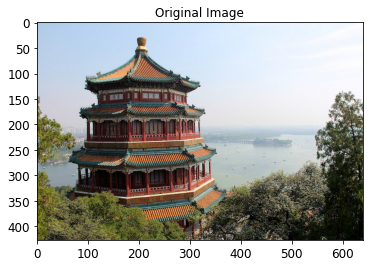

In [ ]:
from sklearn.datasets import load_sample_images

img = load_sample_images()['images'][0]
plt.imshow(img)
plt.title("Original Image")
plt.show()


1. You can also store any tensor you want in a `BytesList` by serializing the tensor using `tf.io.serialize_tensor()`, then putting the resulting byte string in a `BytesList` feature. 

2. Parse the TFRecord, you can parse this data using `tf.io.parse_tensor()`.

In [ ]:
data = tf.io.encode_jpeg(img)

example_with_image = Example(features = Features (feature = {
    "image": Feature(bytes_list = BytesList(value = [data.numpy()]))
}))

serialized_example = example_with_image.SerializeToString()

# then save to TFRecord
feature_description = { "image": tf.io.VarLenFeature(tf.string) }
parsed_example = tf.io.parse_single_example(serialized_example, feature_description)


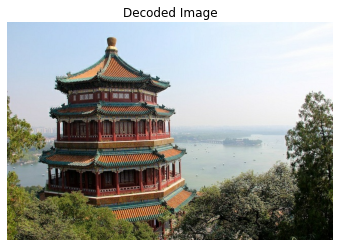

In [ ]:
decoded_img = tf.io.decode_jpeg(parsed_example["image"].values[0])

''' Or use decode_image() which supports BMP, GIF, JPEG and PNG formats'''
# decoded_img = tf.io.decode_image(example_with_image["image"].values[0])

plt.imshow(decoded_img)
plt.title("Decoded Image")
plt.axis("off")
plt.show()

 ### <font color='#0C92AC'>**Putting Tensors and Sparse Tensors in TFRecords**</font>

Tensors can be serialized and parsed easily using `tf.io.serialize_tensor()` and `tf.io.parse_tensor()`:

In [ ]:
t = tf.constant([[0., 1.], [2., 3.], [4., 5.]])
s = tf.io.serialize_tensor(t)
s

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x01\x12\x08\x12\x02\x08\x03\x12\x02\x08\x02"\x18\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\xa0@'>

In [ ]:
tf.io.parse_tensor(s, out_type=tf.float32)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.]], dtype=float32)>

In [ ]:
serialized_sparse = tf.io.serialize_sparse(parsed_example["emails"])
serialized_sparse

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'\x08\t\x12\x08\x12\x02\x08\x02\x12\x02\x08\x01"\x10\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00',
       b'\x08\x07\x12\x04\x12\x02\x08\x02"8\x19\x1dmohamedheba1998@gmail.comhebamohamed14101998@gmail.com',
       b'\x08\t\x12\x04\x12\x02\x08\x01"\x08\x02\x00\x00\x00\x00\x00\x00\x00'],
      dtype=object)>

In [ ]:
BytesList(value=serialized_sparse.numpy())

value: "\010\t\022\010\022\002\010\002\022\002\010\001\"\020\000\000\000\000\000\000\000\000\001\000\000\000\000\000\000\000"
value: "\010\007\022\004\022\002\010\002\"8\031\035mohamedheba1998@gmail.comhebamohamed14101998@gmail.com"
value: "\010\t\022\004\022\002\010\001\"\010\002\000\000\000\000\000\000\000"

Instead of parsing examples one by one using `tf.io.parse_single_example()`, you may want to parse them batch by batch using `tf.io.parse_example()`.




In [ ]:
dataset = tf.data.TFRecordDataset(["my_contacts.tfrecord"]).batch(10)
for serialized_examples in dataset:
    parsed_examples = tf.io.parse_example(serialized_examples,
                                          feature_description)

In [ ]:
parsed_examples

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fdc29078a10>,
 'id': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([123])>,
 'name': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'HebaMohamed'], dtype=object)>}

## <font color='#E123EC'>**Handling Lists of Lists Using the SequenceExample Protobuf**</font>

For example, suppose you want to classify text documents. Each document may be represented as a list of sentences, where each sentence is represented as a list of words. And perhaps each document also has a list of comments, where each comment is also represented as a list of words. Moreover, there may be some contextual data as well, such as the document’s author, title and publication date. 

<font color='#5FCB20'>**TensorFlow’s `SequenceExample` protobuf is designed for such use cases.**
```
message FeatureList { repeated Feature feature = 1; }; 
message FeatureLists { map<string, FeatureList> feature_list = 1; }; 
message SequenceExample { 
  Features context = 1; 
  FeatureLists feature_lists = 2;
};
```



**Warning**: in TensorFlow 2.0 and 2.1, there was a bug preventing `from tensorflow.train import X` so we work around it by writing `X = tf.train.X`. See https://github.com/tensorflow/tensorflow/issues/33289 for more details.

In [ ]:
from tensorflow.train import FeatureList, FeatureLists, SequenceExample

FeatureList = tf.train.FeatureList
FeatureLists = tf.train.FeatureLists
SequenceExample = tf.train.SequenceExample

context = Features(feature={
    "author_id": Feature(int64_list=Int64List(value=[123])),
    "title": Feature(bytes_list=BytesList(value=[b"A", b"desert", b"place", b"."])),
    "pub_date": Feature(int64_list=Int64List(value=[1623, 12, 25]))
})

content = [["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

In [ ]:
def words_to_feature(words):
  return Feature(bytes_list = BytesList(value=[word.encode('utf-8')
                                             for word in words]))

In [ ]:
content_features = [words_to_feature(sentence) for sentence in content]
comments_features = [words_to_feature(comment) for comment in comments]  

A `SequenceExample` contains a:
- A `Features` object for the contextual data(context).
- A `FeatureLists` object which contains one or more named FeatureList objects (feature_lists).
   * Two feature lists "content" and another named "comments".
   * Each `FeatureList` just contains a list of Feature objects,each of which may be a list of byte strings, a list of 64-bit **integers** or a list of **floats**.
   * In this example, each `Feature` would represent a **sentence** or a **comment**, perhaps in the form of a list of **word** identifiers.


In [ ]:
sequence_example = SequenceExample(
    context=context,
    feature_lists=FeatureLists(feature_list={
        "content": FeatureList(feature=content_features),
        "comments": FeatureList(feature=comments_features)
    }))

In [ ]:
sequence_example

In [ ]:
serialized_sequence_example = sequence_example.SerializeToString()

We use `tf.io.parse_single_sequence_example()` to parse a single `SequenceExample` 

- return a tuple containing the **features** (as a **dictionary**) and the **feature lists** (also as a **dictionary**)

In [ ]:

context_feature_descriptions = {
    "author_id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "title": tf.io.VarLenFeature(tf.string),
    "pub_date": tf.io.FixedLenFeature([3], tf.int64, default_value=[0, 0, 0]),
}
sequence_feature_descriptions = {
    "content": tf.io.VarLenFeature(tf.string),
    "comments": tf.io.VarLenFeature(tf.string),
}

parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(
    serialized_sequence_example, context_feature_descriptions,
    sequence_feature_descriptions)

In [ ]:
parsed_context

{'author_id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'pub_date': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1623,   12,   25])>,
 'title': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fdc28a23e50>}

In [ ]:
parsed_context['title'].values

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'A', b'desert', b'place', b'.'], dtype=object)>

In [ ]:
parsed_feature_lists

{'comments': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fdc28a23710>,
 'content': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fdc354845d0>}

If the feature lists contain sequences of varying sizes, you may want to convert them to ragged tensors using `tf.RaggedTensor.from_sparse() `

In [ ]:
print(tf.RaggedTensor.from_sparse(parsed_feature_lists["content"]))

<tf.RaggedTensor [[b'When', b'shall', b'we', b'three', b'meet', b'again', b'?'], [b'In', b'thunder', b',', b'lightning', b',', b'or', b'in', b'rain', b'?']]>


#<font color='#8010CA'>**The Features API**</font>

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


For example, let’s tweak the `housing_median_age` numerical column to define how it should be scaled. 

> Note that this requires computing ahead of time the **mean** and **standard deviation** of this feature in the training set.

In [ ]:
housing_median_age = tf.feature_column.numeric_column("housing_median_age")

In [ ]:
age_mean, age_std = X_mean[1], X_std[1]  # The median age is column in 1
housing_median_age = tf.feature_column.numeric_column(
    "housing_median_age", normalizer_fn=lambda x: (x - age_mean) / age_std)

**Effectively transforming a numerical feature into a categorical feature.**

> For example let’s create a bucketized column based on the median_income column, with 5 buckets: less than 1.5 ($15,000), then 1.5 to 3, 3 to 4.5, 4.5 to 6., and above 6. (notice that when you specify 4 boundaries, there are actually 5 buckets):

In [ ]:
median_income = tf.feature_column.numeric_column("median_income")
bucketized_income = tf.feature_column.bucketized_column(
    median_income, boundaries=[1.5, 3., 4.5, 6.])

If the median_income feature is equal to, say, **3.2**, then the bucketized_income feature will automatically be equal to **2** (the **index** of the corresponding income bucket).

In [ ]:
bucketized_income

BucketizedColumn(source_column=NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(1.5, 3.0, 4.5, 6.0))

## <font color='#E123EC'>**Categorical Features**</font>

In [ ]:
ocean_prox_vocab = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
ocean_proximity = tf.feature_column.categorical_column_with_vocabulary_list(
    "ocean_proximity", ocean_prox_vocab)

In [ ]:
ocean_proximity

VocabularyListCategoricalColumn(key='ocean_proximity', vocabulary_list=('<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [ ]:
# Just an example, it's not used later on
city_hash = tf.feature_column.categorical_column_with_hash_bucket(
    "city", hash_bucket_size=1000)
city_hash

HashedCategoricalColumn(key='city', hash_bucket_size=1000, dtype=tf.string)

## <font color='#E123EC'>**Crossed Categorical Features**</font>

The crossed column will compute a hash of every **age & ocean proximity** combination it comes across, modulo the `hash_bucket_size`, and this will give it the cross category ID. 

* You may then choose to use only this crossed column in your model.
* Or include the individual columns.

In [ ]:
bucketized_age = tf.feature_column.bucketized_column(
    housing_median_age, boundaries=[-1., -0.5, 0., 0.5, 1.]) # age was scaled
age_and_ocean_proximity = tf.feature_column.crossed_column(
    [bucketized_age, ocean_proximity], hash_bucket_size=100)

You start by bucketizing the latitude and longitude, for example into 20 buckets each, then you cross these bucketized features into a loca tion column. This will create a 20×20 grid over California, and each cell in the grid will correspond to one category.

In [ ]:
latitude = tf.feature_column.numeric_column("latitude")
longitude = tf.feature_column.numeric_column("longitude")
bucketized_latitude = tf.feature_column.bucketized_column(
    latitude, boundaries=list(np.linspace(32., 42., 20 - 1)))
bucketized_longitude = tf.feature_column.bucketized_column(
    longitude, boundaries=list(np.linspace(-125., -114., 20 - 1)))
location = tf.feature_column.crossed_column(
    [bucketized_latitude, bucketized_longitude], hash_bucket_size=1000)

## <font color='#E123EC'> **Encoding Categorical Features**</font>
No matter which option you choose to build a categorical feature (categorical columns, bucketized columns or crossed columns), it must be **encoded** before you can feed it to a neural network. 
* Encoding has the size of the vocabulary length.

<font color='#123EC'>**There are two options to encode a categorical feature:**</font>

* A **one-hot vector** encoding, which is fine if there are just a few possible categories (small vecabulary).
* An **embeddings** encoding, which will typically be the case when you use hash buckets(large vocabulary).

<font color='#123EC'> **Why we choudn't use *one-hot* if the vocabulary is large?**</font>

As we will end up with too many inputs fed to your neural network and it will have too many weights to learn and it.

<font color='#123EC'> **As a rule of thumb**</font>
* If the number of categories is **lower than 10**, then **one-hot** encoding is generally the way to go. 

* If the number of categories **is greater than 50** (which is often the case when you use hash buckets), then **embeddings** are usually preferable. 

* In** between 10 and 50** categories, you may want to **experiment with both** options and see which one works best for your use case. 

> <font color='#3EC08A'> Embeddings typically require more training data, unless you can reuse pretrained embeddings.

### <font color='#0C92AC'>**Encoding Categorical Features Using One-Hot Vectors**</font>

In [ ]:
ocean_proximity_one_hot = tf.feature_column.indicator_column(ocean_proximity)

### <font color='#0C92AC'>**Encoding Categorical Features Using Embeddings**</font> 

An embedding is a **trainable dense** vector that represents a category. 

* By default, embeddings are initialized randomly, so for example the "NEAR BAY" category could be represented initially by a random vector such as [0.131, 0.890], while the "NEAR OCEAN" category may be represented by another random vector such as [0.631, 0.791].
* The number of dimensions is a hyperparameter you can tweak.
* Since these embeddings are trainable, they will gradually improve during training.
* They represent fairly similar categories, Gradient Descent will certainly end up pushing them closer together, while it will tend to move them away from the "INLAND" category’s embedding.
<center>
<img src='https://img-blog.csdnimg.cn/20200812174922657.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xpbmxpNTIyMzYyMjQy,size_16,color_FFFFFF,t_70' height = '175' width= '400' /> <figcaption ><font color='#2085E0'>Loading and Preprocessing Data From Multiple CSV Files.</figcaption>
</center>

* Indeed, the better the representation, the easier it will be for the neural network to make accurate predictions.

> <font color='#3EC08A'> So training tends to make embeddings useful representations of the categories. This is called representation learning.


In [ ]:
ocean_proximity_embed = tf.feature_column.embedding_column(ocean_proximity,
                                                           dimension=2)

* Each of the five `ocean_proximity` categories will now be represented as a 2D vector. 
* These vectors are stored in an embedding matrix with **one row per category**, and **one column per embedding dimension**
* In this example it is a 5×2 matrix.

<font color='#123EC'>**Solving the large embedding matrix**</font>
1. Try lowering the dimension hyperparameter, but if you reduce this parameter too much, the representations may not be as good.
2. Reduce the vocabulary size.
    * If you are dealing with text, you can try dropping the rare words from the vocabulary, and replace them all with a token like `<unknown>` or `<UNK>`.
3. If you are using hash buckets, you can also try reducing the `hash_bucket_size`.
    * If you reduce the `hash_bucket_size` too much, you will get collisions.

<font color='#123EC'>**If there are no pretrained embeddings that you can reuse for the task </font> trying to tackle.**

<font color='#00AE0'>**if you do not have enough training data to learn them, then </font> try to learn them on some auxiliary task.**

After that, you can reuse the trained embeddings for your main task.



## <font color='#E123EC'> **Using Feature Columns for Parsing**</font>
* You have created feature columns for each of your input features, as well as for the target.
* You can pass them to the `make_parse_example_spec()` function to generate feature descriptions.

In [ ]:
median_house_value = tf.feature_column.numeric_column("median_house_value")

You have created feature columns for each of your input features, as well as for the target


```
columns = [bucketized_age, ....., median_house_value] # all features + target
```


* Instead of having 2 numerical feature columns, you could choose to have a single 2D column as follows.

In [ ]:
columns = [housing_median_age, median_house_value]
feature_descriptions = tf.feature_column.make_parse_example_spec(columns)
feature_descriptions

{'housing_median_age': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None),
 'median_house_value': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None)}

Creating a function that parses serialized examples using these feature descriptions, and separates the target column from the input features.

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def parse_examples(serialized_examples):
    examples = tf.io.parse_example(serialized_examples, feature_descriptions)
    targets = examples.pop("median_house_value") # separate the targets
    return examples, targets

Next, you can create a TFRecordDataset that will read batches of serialized examples

In [ ]:
with tf.io.TFRecordWriter("my_data_with_features.tfrecords") as f:
    for x, y in zip(X_train[:, 1:2], y_train):
        example = Example(features=Features(feature={
            "housing_median_age": Feature(float_list=FloatList(value=[x])),
            "median_house_value": Feature(float_list=FloatList(value=[y]))
        }))
        f.write(example.SerializeToString())
        

In [ ]:
batch_size = 32
dataset = tf.data.TFRecordDataset(["my_data_with_features.tfrecords"])
dataset = dataset.repeat().shuffle(10000).batch(batch_size).map(parse_examples)

## <font color='#E123EC'> **Using Feature Columns in Your Models** <font color='red'>(this is what i need)</font>

Feature columns can also be used directly in your model, to convert all your input features into a single dense vector 
* All you need to do is add a `keras.layers.DenseFeature`s layer as the **first** layer in your model, passing it the list of feature columns (excluding the target column).
* `keras.layers.DenseFeature` will also apply any extra transformation we specified, such as **scaling** the `housing_median_age` using the `normalizer_fn` function we provided.


**Warning**: the `DenseFeatures` layer currently does not work with the Functional API, see [TF issue #27416](https://github.com/tensorflow/tensorflow/issues/27416). Hopefully this will be resolved before the final release of TF 2.0.

In [ ]:
columns_without_target = columns[:-1]
model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns=columns_without_target),
    keras.layers.Dense(1)
])
model.compile(loss="mse",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.fit(dataset, steps_per_epoch=len(X_train) // batch_size, epochs=5)

Epoch 1/5
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
362/362 [==============================] - 0s 675us/step - loss: 4.7553 - accuracy: 8.8428e-04
Epoch 2/5
362/362 [==============================] - 0s 622us/step - loss: 2.1622 - accuracy: 0.0021
Epoch 3/5
362/362 [==============================] - 0s 583us/step - loss: 1.4673 - accuracy: 0.0032
Epoch 4/5
362/362 [==============================] - 0s 543us/step - loss: 1.3786 - accuracy: 0.0033
Epoch 5/5
362/362 [==============================] - 0s 537us/step - loss: 1.3404 - accuracy: 0.0034


We create a `DenseFeatures` layer with just two columns.
   * The `bucketized_income` column relies on the `median_income` column, the dictionary must include the **median_income** key.
   
`boundaries=[1.5, 3., 4.5, 6.]`
      
      * Category 0 for incomes below 1.5
      * Category 1 for incomes between 1.5 and 3.
      * Category 2 for incomes between 3 and 4.5.
      * Category 3 for incomes between 4.5 and 6.
      * Category 4 for incomes greater than 6. 
      **Ex: The incomes 3, 7.2 and 1 get mapped respectively to category:**
      * 3    => cat 2 => $\text{one-hot}=[0., 0., 1., 0., 0.]$
      * 7.2  => cat 4 => $\text{one-hot}=[0., 0., 0., 0., 1.]$
      * 1    => cat 0 => $\text{one-hot}=[0., 0., 0., 0., 0.]$
      * Note that bucketized columns get one-hot encoded by default, no need to call `indicator_column`.

* The `ocean_proximity_embed` column is based on the `ocean_proximity` column, the dictionary must include the **ocean_proximity** key.
    * The *NEAR OCEAN* and *INLAND* categories just get mapped to their respective embeddings *which were initialized randomly*.

The resulting tensor is the concatenation of the one-hot vectors and the embeddings

In [ ]:
some_columns = [ocean_proximity_embed, bucketized_income]
dense_features = keras.layers.DenseFeatures(some_columns)
dense_features({
    "ocean_proximity": [["NEAR OCEAN"], ["INLAND"], ["INLAND"]],
    "median_income": [[3.], [7.2], [1.]]
})

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        -0.14504611,  0.7563394 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.1119912 ,  0.56957847],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.1119912 ,  0.56957847]], dtype=float32)>

Now you can feed all kinds of features to a neural network, including **numerical** features, **categorical** features, and even **text** (by splitting the text into words, then using word embedding)

However, performing all the preprocessing on the fly can **slow down training**.

# <font color='#8010CA'>**Handling The Computationally Expensive Of The Preprocessing**</font> 

* Handling the data will be preprocessed just **once per instance before training**, rather than once per instance and per epoch during training.

* Tools like **Apache Beam** let you run efficient data processing pipelines over large amounts of data.

    * <font color='red'>**Problem**</font>: once your model is trained, suppose you want to deploy it to a mobile app: you will need to **write some code in your app** to take care of preprocessing the data before it is fed to the model and the same thing when run it in a web browser.
    * Aso, whenever you want to change the preprocessing logic, you will need to **update** your **Apache Beam** code, your mobile **app** code and your **Javascript** code. It is not only *time consuming, but also error prone.*
    * <font color='blue'>**Improvement**</font>: before deploying it to your app or the browser, add an extra input layer (`DenseFeatures`) to take care of preprocessing on the fly

But what if you could define your preprocessing operations just once? This is what **TF Transform** was designed for.

# <font color='#8010CA'>**TF Transform**</font>

It is part of TensorFlow Extended (TFX), an end-to end platform for productionizing TensorFlow models. 

1. Install it, it does not come bundled with TensorFlow. 

2. Define your preprocessing function just once.
   * Using TF Transform functions for scaling, bucketizing, crossing features, and more.
   * You can also use any TensorFlow operation you need.
3. TF Transform lets you apply this `preprocess()` function to the whole training set using **Apache Beam**.
   * It provides an `AnalyzeAndTransformDataset` class that you can use for this purpose in your **Apache Beam** pipeline.
   * In the process, it will also compute all the necessary statistics over the whole training set: in this example, the **mean** and **std** of the `housing_median_age` feature, and the vocabulary for the `ocean_proximity` feature.
   * The components that compute these statistics are called **analyzers**.


>TF Transform only supports TensorFlow 1. Moreover, Apache Beam only has partial support for Python 3.

In [ ]:
try:
    import tensorflow_transform as tft

    def preprocess(inputs):  # inputs is a batch of input features
        median_age = inputs["housing_median_age"]
        ocean_proximity = inputs["ocean_proximity"]
        standardized_age = tft.scale_to_z_score(median_age - tft.mean(median_age))
        ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
        return {
            "standardized_median_age": standardized_age,
            "ocean_proximity_id": ocean_proximity_id
        }
except ImportError:
    print("TF Transform is not installed. Try running: pip3 install -U tensorflow-transform")

# <font color='#8010CA'>**The TensorFlow Datasets (TFDS) Project**</font> 

With the Data API, TFRecords, the Features API and TF Transform, you can build highly scalable input pipelines for training, and also benefit from fast and portable data preprocessing in production. But what if you just wanted to use a standard dataset? Well in that case, things are much simpler: just use TFDS!

Download common [datasets](https://homl.info/tfds), from small ones like MNIST or Fashion MNIST, to huge datasets like ImageNet.

1. TFDS is not bundled with TensorFlow, so you need to install the `tensorflowdatasets` library (e.g., using pip).

2. Call the `tfds.load()` function, and it will download the data you want.
3. Return the data as a dictionary of Datasets.
4. You can then apply any transformation you want (typically repeating, batching and prefetching).
5. You’re ready to train your model.


In [ ]:
import tensorflow_datasets as tfds

datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]

/Users/ageron/tensorflow_datasets/mnist/3.0.0
Using /Users/ageron/tensorflow_datasets/mnist/3.0.1 instead.


local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /Users/ageron/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
print(tfds.list_builders())

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'arc', 'bair_robot_pushing_small', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'cos_e', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_rc', 'esnli', 'eurosat', 'fashion_mnist', 'flic', 'flores', 'food101', 'forest_fires', 'gap', 'geirhos_conflict_stimuli', 'german_credit_numeric', 'gigaword', '

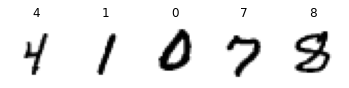

In [ ]:
plt.figure(figsize=(6,3))
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)
for item in mnist_train:
    images = item["image"]
    labels = item["label"]
    for index in range(5):
        plt.subplot(1, 5, index + 1)
        image = images[index, ..., 0]
        label = labels[index].numpy()
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")
    break # just showing part of the first batch

> In general, `load()` returns a shuffled training set, so there’s no need to shuffle it some more.

> Note that each item in the dataset is a dictionary containing both the features and the labels. But Keras expects each item to be a tuple containing 2 elements so, you could transform the dataset using the `map()` method.

In [ ]:
datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]
mnist_train = mnist_train.repeat(5).batch(32)
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)
for images, labels in mnist_train.take(1):
    print(images.shape)
    print(labels.numpy())

(32, 28, 28, 1)
[4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Or you can just ask the `load()` function to do this for you by setting `as_super vised=True`.
 * Obviously this works only for labeled datasets.

You can also specify the batch size if you want.

In [ ]:
datasets = tfds.load(name="mnist", batch_size=32, as_supervised=True)
mnist_train = datasets["train"].repeat().prefetch(1)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Lambda(lambda images: tf.cast(images, tf.float32)),
    keras.layers.Dense(10, activation="softmax")])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.fit(mnist_train, steps_per_epoch=60000 // 32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 997us/step - loss: 42.8499 - accuracy: 0.8034
Epoch 2/5
1875/1875 [==============================] - 1s 481us/step - loss: 25.1669 - accuracy: 0.8687
Epoch 3/5
1875/1875 [==============================] - 1s 460us/step - loss: 24.1730 - accuracy: 0.8744
Epoch 4/5
1875/1875 [==============================] - 1s 446us/step - loss: 23.7216 - accuracy: 0.8760
Epoch 5/5
1875/1875 [==============================] - 1s 444us/step - loss: 23.1382 - accuracy: 0.8786


# <font color='#8010CA'>**The TensorFlow Hub**</font> 

مش عارفه اي دا اصلا



In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
import tensorflow_hub as hub

hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1",
                           output_shape=[50], input_shape=[], dtype=tf.string)

model = keras.Sequential()
model.add(hub_layer)
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 833
Non-trainable params: 48,190,600
_________________________________________________________________


In [ ]:
sentences = tf.constant(["It was a great movie", "The actors were amazing"])
embeddings = hub_layer(sentences)

In [ ]:
embeddings

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 7.45939985e-02,  2.76720114e-02,  9.38646123e-02,
         1.25124469e-01,  5.40293928e-04, -1.09435350e-01,
         1.34755149e-01, -9.57818255e-02, -1.85177118e-01,
        -1.69703495e-02,  1.75612606e-02, -9.06603858e-02,
         1.12110220e-01,  1.04646273e-01,  3.87700424e-02,
        -7.71859884e-02, -3.12189370e-01,  6.99466765e-02,
        -4.88970093e-02, -2.99049795e-01,  1.31183028e-01,
        -2.12630898e-01,  6.96169436e-02,  1.63592950e-01,
         1.05169769e-02,  7.79720694e-02, -2.55230188e-01,
        -1.80790052e-01,  2.93739915e-01,  1.62875261e-02,
        -2.80566931e-01,  1.60284728e-01,  9.87277832e-03,
         8.44555616e-04,  8.39456245e-02,  3.24002892e-01,
         1.53253034e-01, -3.01048346e-02,  8.94618109e-02,
        -2.39153411e-02, -1.50188789e-01, -1.81733668e-02,
        -1.20483577e-01,  1.32937476e-01, -3.35325629e-01,
        -1.46504581e-01, -1.25251599e-02, -1.64428815e-01,
       